# Day 4 Notebook

In [26]:
import pandas as pd
import numpy as np
import scipy

In [3]:
# Data on the first four elements of the periodic table:
elements_data = {
    'Element' : ['H', 'He', 'Li', 'Be'],
    'Atomic Number' : [ 1, 2, 3, 4 ],
    'Mass' : [ 1.008, 4.002, 6.940, 9.012],
    'Electronegativity' : [ 2.20, 0.0, 0.98, 1.57 ]
}

# construct dataframe from data dictionary:
df = pd.DataFrame(elements_data)

In [4]:
display(df)

,Element,Atomic Number,Mass,Electronegativity
0,H,1,1.008,2.20
1,He,2,4.002,0.00
2,Li,3,6.940,0.98
3,Be,4,9.012,1.57


In [9]:
display(df['Element'])

0     H
1    He
2    Li
3    Be
Name: Element, dtype: object

In [7]:
display(df[ ['Element', 'Mass'] ])

,Element,Mass
0,H,1.008
1,He,4.002
2,Li,6.940
3,Be,9.012


In [11]:
df.iloc[0, 1]

np.int64(1)

In [13]:
df.iloc[:2, :2]

,Element,Atomic Number
0,H,1
1,He,2


In [14]:
df.at[1, 'Electronegativity']

np.float64(0.0)

In [19]:
element_masses = np.array(df['Mass'])

print(element_masses)

[1.008 4.002 6.94  9.012]


In [22]:
electronegative_df = df[ (df['Electronegativity'] > 0) & (df['Electronegativity'] < 2) ]

In [23]:
display(electronegative_df)

,Element,Atomic Number,Mass,Electronegativity
2,Li,3,6.940,0.98
3,Be,4,9.012,1.57


In [24]:
display(df)

,Element,Atomic Number,Mass,Electronegativity
0,H,1,1.008,2.20
1,He,2,4.002,0.00
2,Li,3,6.940,0.98
3,Be,4,9.012,1.57


In [25]:
df['Group'] = [ 1, 18, 1, 2 ]
df['Period'] = [ 1, 1, 2, 2, ]

display(df)

,Element,Atomic Number,Mass,Electronegativity,Group,Period
0,H,1,1.008,2.20,1,1
1,He,2,4.002,0.00,18,1
2,Li,3,6.940,0.98,1,2
3,Be,4,9.012,1.57,2,2


In [28]:
from scipy.constants import proton_mass, neutron_mass, m_u

def approximate_mass(atomic_number):
    return atomic_number * (proton_mass + neutron_mass) / m_u

df['Estimated Mass'] = df['Atomic Number'].apply(approximate_mass)

display(df)

,Element,Atomic Number,Mass,Electronegativity,Group,Period,Estimated Mass
0,H,1,1.008,2.20,1,1,2.015941
1,He,2,4.002,0.00,18,1,4.031883
2,Li,3,6.940,0.98,1,2,6.047824
3,Be,4,9.012,1.57,2,2,8.063766


In [29]:
df.describe()

,Atomic Number,Mass,Electronegativity,Group,Period,Estimated Mass
count,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000
mean,2.500000,5.240500,1.187500,5.500000,1.50000,5.039853
std,1.290994,3.490962,0.935356,8.346656,0.57735,2.602569
min,1.000000,1.008000,0.000000,1.000000,1.00000,2.015941
25%,1.750000,3.253500,0.735000,1.000000,1.00000,3.527897
50%,2.500000,5.471000,1.275000,1.500000,1.50000,5.039853
75%,3.250000,7.458000,1.727500,6.000000,2.00000,6.551809
max,4.000000,9.012000,2.200000,18.000000,2.00000,8.063766


In [34]:
print(df['Mass'].mean())
print(df['Mass'].median())
print(df['Mass'].min())
print(df['Mass'].std())

5.2405
5.471
1.008
3.4909621882799016


In [35]:
print(df.groupby('Group')['Electronegativity'].mean())

Group
1     1.59
2     1.57
18    0.00
Name: Electronegativity, dtype: float64


## Importing and Exporting Data

In [37]:
display(df)

,Element,Atomic Number,Mass,Electronegativity,Group,Period,Estimated Mass
0,H,1,1.008,2.20,1,1,2.015941
1,He,2,4.002,0.00,18,1,4.031883
2,Li,3,6.940,0.98,1,2,6.047824
3,Be,4,9.012,1.57,2,2,8.063766


In [38]:
df.to_csv('elements_csv_file.csv', index=False)

In [40]:
imported_df = pd.read_csv('elements_csv_file.csv')

In [41]:
display(imported_df)

,Element,Atomic Number,Mass,Electronegativity,Group,Period,Estimated Mass
0,H,1,1.008,2.20,1,1,2.015941
1,He,2,4.002,0.00,18,1,4.031883
2,Li,3,6.940,0.98,1,2,6.047824
3,Be,4,9.012,1.57,2,2,8.063766


In [44]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 584.5 kB/s eta 0:00:000:00:010:00:01


In [45]:
imported_df.to_excel('elements_excel.xlsx')

## Exercise: Exploring the Periodic Table

In [47]:
import pandas as pd

# Load periodic table dataframe:
ptable_df = pd.read_csv('Periodic Table of Elements.csv')

# Display dataframe columns:
#display(ptable_df.columns) 

# Display dataframe:
display(ptable_df)

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Flerovium,Fl,289.000,175,114,114,7,14.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7,4.0
114,115,Moscovium,Mc,288.000,173,115,115,7,15.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,5.0
115,116,Livermorium,Lv,292.000,176,116,116,7,16.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7,6.0
116,117,Tennessine,Ts,295.000,178,117,117,7,17.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,7.0


## Question 1:

In [55]:
elems_before_1900 = ptable_df[ ptable_df['Year'] < 1900 ]['Year'].count()

In [57]:
print(elems_before_1900/ ptable_df['Year'].count())

0.6635514018691588


In [54]:
year_discovered = ptable_df['Year']
frac = year_discovered[year_discovered < 1900].count() / year_discovered.count()
print(frac)

0.6635514018691588


In [58]:
n_isotopes = ptable_df['NumberOfIsotopes']
max_isotope_df = ptable_df[n_isotopes >= 100]
print(max_isotope_df[['Element','NumberOfIsotopes']])


         Element  NumberOfIsotopes
92     Neptunium             153.0
93     Plutonium             163.0
94     Americium             133.0
95        Curium             133.0
97   Californium             123.0
98   Einsteinium             123.0
99       Fermium             103.0
102   Lawrencium             203.0


In [59]:
radioactive_elements = ptable_df[ptable_df['Radioactive'] == 'yes']
print(radioactive_elements['AtomicMass'].mean())

248.0298108108108


## Data Visualization with Matplotlib

In [92]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

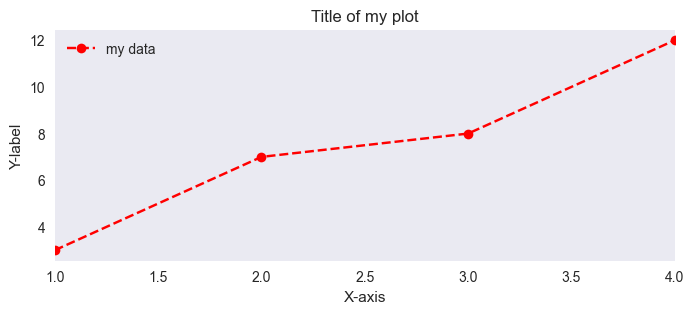

In [93]:
# create some data
x = [ 1, 2, 3, 4 ]
y = [ 3, 7, 8, 12 ]

# Generate a new matplotlib figure
plt.figure(figsize=(8,3))

# Add a grid behind our plot
plt.grid()

# plot the x-y data
plt.plot(x,y, linestyle='--', color='red', marker='o', label='my data')

# label the axes of the plot
plt.xlabel('X-axis')
plt.ylabel('Y-label')

# set limits on the x axis:
plt.xlim((1, 4))

# add a title
plt.title('Title of my plot')

# add legend to the plot
plt.legend(loc='upper left')

# show the plot
plt.show()

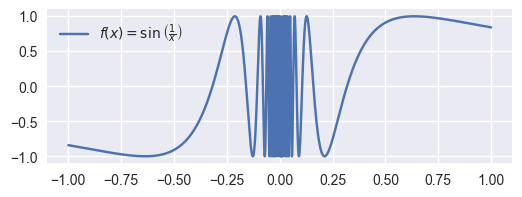

In [94]:
plt.figure(figsize=(6,2))

# plot: y = sin(1/x)
x_pts = np.linspace(-1, 1, 10000)
y_pts = np.sin(1/x_pts)

# in Python this is called a "raw" string
label = r'$f(x) = \sin\left( \frac{1}{x} \right)$'

plt.plot(x_pts, y_pts, label=label)

plt.legend()
plt.show()

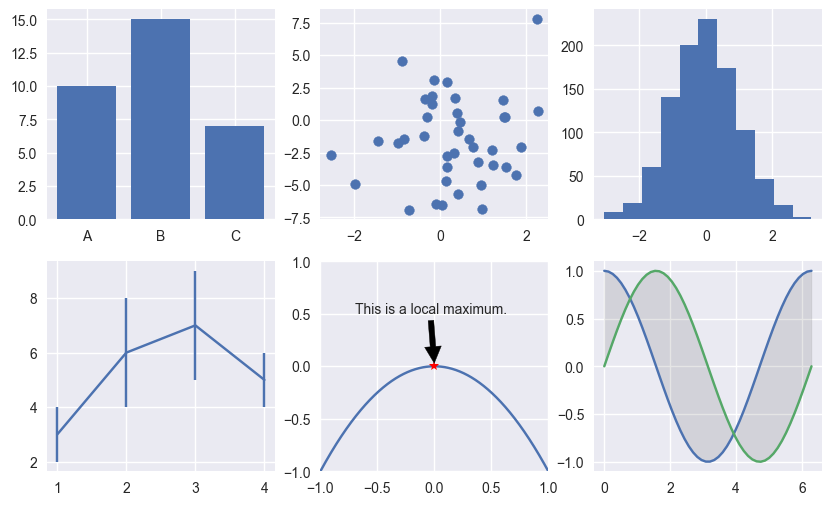

In [95]:
# seed random number generator:
np.random.seed(0) 

# create a large plot to hold three subfigures:
plt.figure(figsize=(10,6))

# Subplot 1: Bar plot example
plt.subplot(2, 3, 1) # 2 rows, 3 columns, plot 1
categories = ['A', 'B', 'C']
values = [10, 15, 7]
plt.bar(categories, values)

# subplot 2: Scatter plot example
plt.subplot(2, 3, 2) # 2 rows, 3 columns, plot 2
data_x = np.random.normal(0,1,size=40)
data_y = np.random.normal(0,4,size=40)
plt.scatter(data_x, data_y)

# subplot 3: Histogram example:
plt.subplot(2, 3, 3) # (... and so on)
data_x = np.random.normal(0,1,size=1000)
plt.hist(data_x, bins=11)

# subplot 4: Errorbar example:
plt.subplot(2, 3, 4)
data_x = [ 1, 2, 3, 4  ]
data_y = [ 3, 6, 7, 5 ]
err_y =  [ 1, 2, 2, 1  ]
plt.errorbar(data_x, data_y, err_y, capsize=5) 

# subplot 5: Text and annotations:
plt.subplot(2, 3, 5)
u = np.linspace(-1,1,1000)
v = -u**2
plt.plot(u,v)
plt.plot([0], [0], 'r*')
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.annotate('This is a local maximum.', xy=(0,0.02), xytext=(-0.7,0.5),
            arrowprops={'facecolor': 'black', 'shrink' : 0.02})

# subplot 6: Fill between:
plt.subplot(2, 3, 6)
x_pts = np.linspace(0,2*np.pi)
y1_pts = np.cos(x_pts)
y2_pts = np.sin(x_pts)

plt.plot(x_pts, y1_pts)
plt.plot(x_pts, y2_pts)
plt.fill_between(x_pts, y1_pts, y2_pts, 
                 color='black', alpha=0.1)

plt.show()

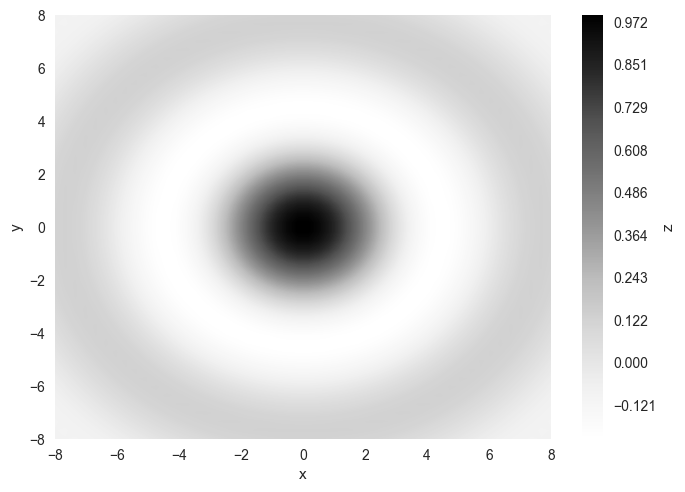

In [96]:
import numpy as np

# generate a mesh of x and y points:
x_pts = np.linspace(-8, 8, 50)
y_pts = np.linspace(-8, 8, 50)
X, Y = np.meshgrid(x_pts, y_pts)

# evaluate Z as a function  of X and Y:
Z = np.sin(np.sqrt(X**2 + Y**2)) / np.sqrt(X**2 + Y**2)

# display as a high-resolution contour plot:
plt.figure()
contours = plt.contourf(X, Y, Z, levels=1000) # more levels -> higher resoltion
plt.xlabel('x')
plt.ylabel('y')

# generate a colorbar:
plt.colorbar(contours, label='z')

plt.show()

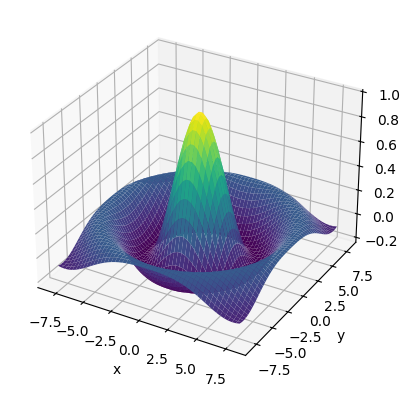

In [91]:
fig = plt.figure()

# create 3D axes:
ax = plt.subplot(projection='3d')

# plot 3D surface (from previous example):
ax.plot_surface(X,Y,Z, cmap='viridis')

# label axes:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.savefig('my_figure.png')
#plt.show()

## Matplotlib Exercises

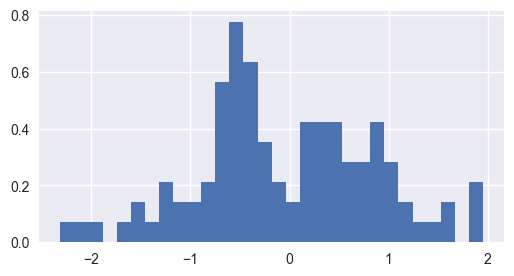

In [101]:
# generate plot 1:
samples = np.random.normal(0,1,size=100)

plt.figure(figsize=(6,3))
plt.hist(samples, bins=30, density=True)
plt.show()

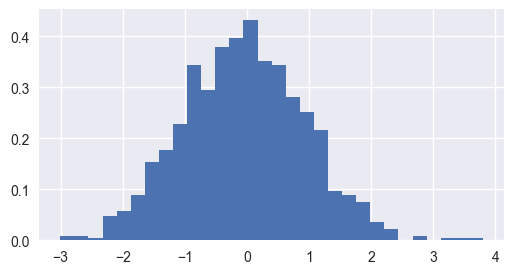

In [102]:
samples_2 = np.random.normal(0,1,size=1000)

plt.figure(figsize=(6,3))
plt.hist(samples_2, bins=30, density=True)
plt.show()

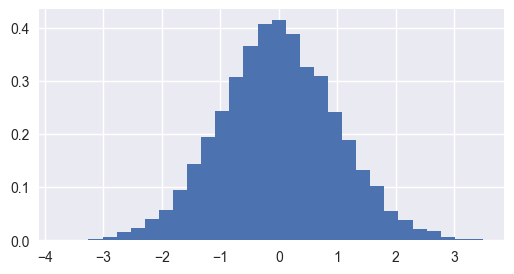

In [103]:
samples_3 = np.random.normal(0,1,size=10000)

plt.figure(figsize=(6,3))
plt.hist(samples_3, bins=30, density=True)
plt.show()

In [118]:
from scipy.integrate import odeint

a = 11
b = 28
c = 8/3

# define the lorenz system:
def lorenz_system(xyz, t):
    x, y, z = xyz
    return np.array([
        a*(y - x),
        x*(b - z) - y,
        x*y - c*z
    ])

# set initial conditions:
xyz_init = (1,1,1)
t_values = np.linspace(0,60,10000)

# integrate system:
trajectory = odeint(lorenz_system, xyz_init, t_values)

In [119]:
print(trajectory.shape)

(10000, 3)


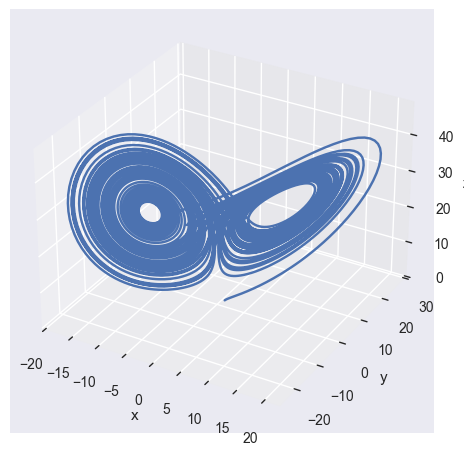

In [120]:
fig = plt.figure()

# create 3D axes:
ax = plt.subplot(projection='3d')
ax.plot(trajectory[:,0], trajectory[:,1], trajectory[:,2])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()